In [1]:
import sys, os
sys.path.append(os.path.abspath('../../Software/rate_analysis/'))
import rate_methods as RM
import numpy as np
import seaborn as sns
import json
from matplotlib import pyplot as plt
from matplotlib import patches
%matplotlib inline

## Figure 1: Matched-Harmonic Potential

In [2]:
x = np.linspace(-9,9,100)

dU = 8
x0 = -3
x1 = 3
w0 = np.sqrt(dU)/x0
w1 = np.sqrt(dU)/x1
y = (0.5*w0*w0*(x-x0)**2 - 0.5*dU)*(1.-np.heaviside(x,0.5)) - (0.5*w1*w1*(x-x1)**2 - 0.5*dU)*np.heaviside(x,0.5) + 0.5*dU

In [3]:
pace_1d = [1e1,1e2,1e3,1e4]
kramers = 9.491650747250123e-07
observed = 1.03793094e-06

with open('../../Results/Rates/rates_X_gamma1_wt.json') as f:
    X1_rates_data = json.load(f)

In [4]:
def get_EATR_CDF(k0, gamma, beta, directory, colvar_name, log_name, plog_len, biascol, t=None):
    print(f"{directory}")
    colvars = []
    plogs = []
    runs = [f"run_{i+1}" for i in range(100)]
    for run in runs:
        colvars.append(f"{directory}/{run}/{colvar_name}")
        plogs.append(f"{directory}/{run}/{log_name}")
        
    colvars_count = len(colvars)
    colvars_maxrow_count = None
    
    data = []
    times = []
    for colvar in colvars:
        data.append(np.loadtxt(colvar))
        times.append(data[-1][-1][0])
        colvars_maxrow_count = data[-1].shape[0] if colvars_maxrow_count is None or colvars_maxrow_count < data[-1].shape[0] else colvars_maxrow_count
    
    event = []
    for plog in plogs:
        with open(plog,'r') as f:
            if len(f.readlines()) > plog_len:
                event.append(True)
            else:
                event.append(False)
    event = np.array(event)
    M = event.sum()
    
    times = np.sort(times)
    v_data, ix_col = RM.inst_bias(data, colvars_count, colvars_maxrow_count, beta, biascol)
    spline = RM.EATR_calculate_avg_acc(gamma, v_data, beta, ix_col)
    if t is not None:
        return times, RM.EATR_CDF(t, k0, gamma, spline, 1), M
    return times, RM.EATR_CDF(times, k0, gamma, spline, 1), M

In [5]:
unbiased_data = np.loadtxt('../../Data/X_matched_harmonics_wt/unbiased_output.dat')

def tcdf(t,k):
    return 1 - np.exp(-k*t)

def ecdf(res_t):
    x = np.sort(res_t)
    n = 200
    ntrans = x.size
    y = np.linspace(0,1,n+1)[1:ntrans+1]
    return x, y

unbiased_ecdfx, unbiased_ecdfy = ecdf(unbiased_data[:,0])

k_fit = 1.03793094e-06
unbiased_tcdfx = np.linspace(1e3,7e6,1000)
unbiased_tcdfy_fit = tcdf(unbiased_tcdfx,k_fit)

k_kramers = 9.491650747250123e-07
unbiased_tcdfy_kramers = tcdf(unbiased_tcdfx,k_kramers)

In [6]:
y_cdfs = np.linspace(0,1,101)[1:]
    
x1e3, y1e3, _ = get_EATR_CDF(X1_rates_data["EATR CDF k"][0], 1.0, 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e3', 'metad.colvar', 'metad.colvar', 1, 2)
x1e4, y1e4, _ = get_EATR_CDF(X1_rates_data["EATR CDF k"][1], 1.0, 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e4', 'metad.colvar', 'metad.colvar', 1, 2)
x1e5, y1e5, _ = get_EATR_CDF(X1_rates_data["EATR CDF k"][2], 1.0, 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e5', 'metad.colvar', 'metad.colvar', 1, 2)
x1e6, y1e6, _ = get_EATR_CDF(X1_rates_data["EATR CDF k"][3], 1.0, 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e6', 'metad.colvar', 'metad.colvar', 1, 2)

../../Data/X_matched_harmonics_wt/xruns_pace1e3
../../Data/X_matched_harmonics_wt/xruns_pace1e4
../../Data/X_matched_harmonics_wt/xruns_pace1e5
../../Data/X_matched_harmonics_wt/xruns_pace1e6


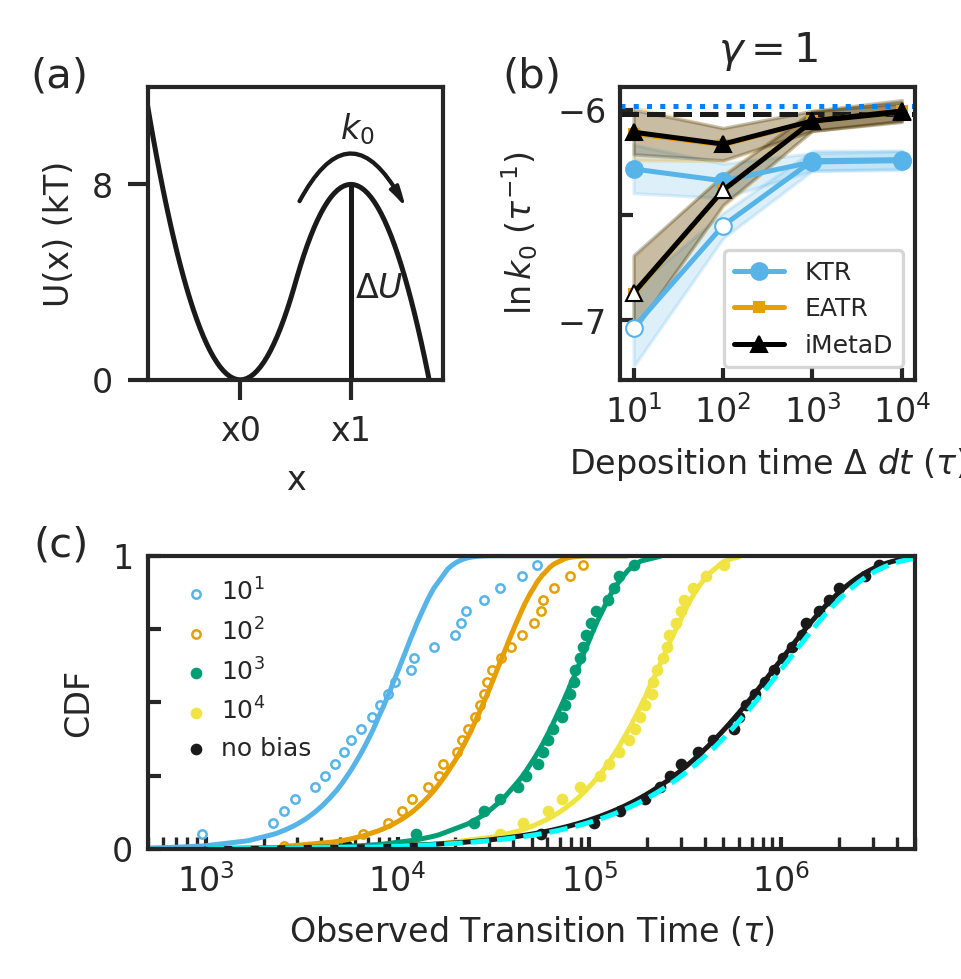

In [7]:
"""
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 6, 'axes.linewidth': 0.7, 'lines.linewidth': 1.0, 'axes.titlesize': 6,
                             'xtick.labelsize': 6, 'ytick.labelsize': 6, 'xtick.major.width': 0.7, 'ytick.major.width': 0.7,
                             'legend.fontsize': 4.5, 'legend.framealpha': 0, 'lines.markersize': 3})
"""
sns.set_theme()
sns.set_style('ticks')
sns.set_context('paper', rc={'axes.labelsize': 8, 'axes.linewidth': 1.0, 'lines.linewidth': 1.2, 'axes.titlesize': 10,
                             'xtick.labelsize': 8, 'ytick.labelsize': 8, 'xtick.major.width': 1.0, 'ytick.major.width': 1.0,
                             'legend.fontsize': 6, 'legend.framealpha': 0, 'lines.markersize': 4})

fig = plt.figure(figsize=(3.3,3.3),dpi=300)
plt.subplots_adjust(wspace=0.6,hspace=0.6)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Fig. 1a
ax1.set_xlim((-8,8))
ax1.set_ylim((0,12))
ax1.set_xlabel('x')
ax1.set_ylabel('U(x) (kT)')
ax1.set_xticks([-3,3],labels=['x0','x1'])
ax1.set_yticks([0,8])
ax1.plot(x,y,color='k')
ax1.plot((3,3),(0,8),color='k')
arrow = patches.FancyArrowPatch((0,7),(6,7),connectionstyle="arc3,rad=-1",arrowstyle="simple, head_width=2, head_length=4",color='k')
ax1.add_patch(arrow)
ax1.text(-0.4,1.0,"(a)",fontsize=10,transform=ax1.transAxes)
ax1.text(0.65,0.82,"$k_0$",fontsize=8,transform=ax1.transAxes)
ax1.text(0.7,0.28,"$\\Delta U$",fontsize=8,transform=ax1.transAxes)

# Fig. 1b
ax2.set_xlabel('Deposition time $\\Delta~dt$ ($\\tau$)')
ax2.set_ylabel('$\\ln k_0$ ($\\tau^{-1}$)')
ax2.set_xscale('log')
ax2.axhline(np.log10(kramers),linestyle='--',color='k')
ax2.axhline(np.log10(observed),linestyle=':',color='#007FFF')
ax2.set_title('$\\gamma=1$')
ax2.fill_between(pace_1d,np.log10(np.array(X1_rates_data["KTR Vmb MLE k"]))-X1_rates_data["KTR Vmb MLE std k"],np.log10(np.array(X1_rates_data["KTR Vmb MLE k"]))+X1_rates_data["KTR Vmb MLE std k"],color='#56B4E9',alpha=0.2)
ax2.plot(pace_1d,np.log10(np.array(X1_rates_data["KTR Vmb MLE k"])),marker='o',mfc='#FFFFFF',mew=0.5,color='#56B4E9')
ax2.fill_between(pace_1d,np.log10(np.array(X1_rates_data["KTR Vmb CDF k"]))-X1_rates_data["KTR Vmb CDF std k"],np.log10(np.array(X1_rates_data["KTR Vmb CDF k"]))+X1_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
ax2.plot(pace_1d,np.log10(np.array(X1_rates_data["KTR Vmb CDF k"])),label='KTR',marker='o',mew=0.5,color='#56B4E9')
ax2.fill_between(pace_1d,np.log10(np.array(X1_rates_data["EATR MLE k"]))-X1_rates_data["EATR MLE std k"],np.log10(np.array(X1_rates_data["EATR MLE k"]))+X1_rates_data["EATR MLE std k"],color='#E69F00',alpha=0.2)
ax2.plot(pace_1d,np.log10(np.array(X1_rates_data["EATR MLE k"])),marker='s',mfc='#FFFFFF',markersize=2.5,mew=0.5,color='#E69F00')
ax2.fill_between(pace_1d,np.log10(np.array(X1_rates_data["EATR CDF k"]))-X1_rates_data["EATR CDF std k"],np.log10(np.array(X1_rates_data["EATR CDF k"]))+X1_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
ax2.plot(pace_1d,np.log10(np.array(X1_rates_data["EATR CDF k"])),label='EATR',marker='s',markersize=2.5,mew=0.5,color='#E69F00')
ax2.fill_between(pace_1d,np.log10(np.array(X1_rates_data["iMetaD MLE k"]))-X1_rates_data["iMetaD MLE std k"],np.log10(np.array(X1_rates_data["iMetaD MLE k"]))+X1_rates_data["iMetaD MLE std k"],color='#000000',alpha=0.2)
ax2.plot(pace_1d,np.log10(np.array(X1_rates_data["iMetaD MLE k"])),marker='^',mfc='#FFFFFF',mew=0.5,color='#000000')
ax2.fill_between(pace_1d,np.log10(np.array(X1_rates_data["iMetaD CDF k"]))-X1_rates_data["iMetaD CDF std k"],np.log10(np.array(X1_rates_data["iMetaD CDF k"]))+X1_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
ax2.plot(pace_1d,np.log10(np.array(X1_rates_data["iMetaD CDF k"])),label='iMetaD',marker='^',mew=0.5,color='#000000')
ax2.set_xticks([1e1,1e2,1e3,1e4])
ax2.set_yticks([-6,-6.5,-7],labels=['$-6$','','$-7$'])
ax2.legend()
ax2.tick_params(axis='both', direction='in', which='both', length=3)
ax2.text(-0.4,1.0,"(b)",fontsize=10,transform=ax2.transAxes)

# Fig. 1c
ax3.set_xlabel('Observed Transition Time ($\\tau$)')
ax3.set_ylabel('CDF')
ax3.set_xlim((5e2,5e6))
ax3.set_ylim((0,1))
ax3.set_yticks([0,0.25,0.5,0.75,1],labels=['0','','','','1'])
ax3.set_xscale('log')
ax3.scatter(x1e3[::4],y_cdfs[::4],color='#FFFFFF',marker='.',edgecolors='#56B4E9',linewidths=0.6,label='$10^1$')
ax3.plot(x1e3,y1e3,color="#56B4E9",linestyle='-')
ax3.scatter(x1e4[::4],y_cdfs[::4],color='#FFFFFF',marker='.',edgecolors='#E69F00',linewidths=0.6,label='$10^2$')
ax3.plot(x1e4,y1e4,color="#E69F00",linestyle='-')
ax3.scatter(x1e5[::4],y_cdfs[::4],color='#009E75',marker='.',label='$10^3$')
ax3.plot(x1e5,y1e5,color="#009E75",linestyle='-')
ax3.scatter(x1e6[::4],y_cdfs[::4],color="#F0E442",marker='.',label='$10^4$')
ax3.plot(x1e6,y1e6,color="#F0E442",linestyle='-')
ax3.scatter(unbiased_ecdfx[1::8],unbiased_ecdfy[1::8],color="k",marker='.',label='no bias')
ax3.plot(unbiased_tcdfx,unbiased_tcdfy_fit,color="k",linestyle='-')
ax3.plot(unbiased_tcdfx,unbiased_tcdfy_kramers,color='cyan',linestyle='--')
ax3.legend(frameon=False,handletextpad=0)
ax3.tick_params(axis='both', direction='in', which='both', length=3)
ax3.text(-0.15,1.0,"(c)",fontsize=10,transform=ax3.transAxes)

plt.savefig("EATR_Fig1.pdf",format='pdf')#,bbox_inches='tight')

## Figure 2: Matched-Harmonic Potential Fitting $\gamma$

In [8]:
with open('../../Results/Rates/rates_X_wt.json','r') as f:
    X_rates_data = json.load(f)
    
y_cdfs_fit = np.linspace(0,1,101)[1:]
    
x1e3_fit, y1e3_fit, _ = get_EATR_CDF(X_rates_data["EATR CDF k"][0], X_rates_data["EATR CDF g"][0], 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e3', 'metad.colvar', 'metad.colvar', 1, 2)
x1e4_fit, y1e4_fit, _ = get_EATR_CDF(X_rates_data["EATR CDF k"][1], X_rates_data["EATR CDF g"][1], 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e4', 'metad.colvar', 'metad.colvar', 1, 2)
x1e5_fit, y1e5_fit, _ = get_EATR_CDF(X_rates_data["EATR CDF k"][2], X_rates_data["EATR CDF g"][2], 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e5', 'metad.colvar', 'metad.colvar', 1, 2)
x1e6_fit, y1e6_fit, _ = get_EATR_CDF(X_rates_data["EATR CDF k"][3], X_rates_data["EATR CDF g"][3], 1.0, '../../Data/X_matched_harmonics_wt/xruns_pace1e6', 'metad.colvar', 'metad.colvar', 1, 2)

../../Data/X_matched_harmonics_wt/xruns_pace1e3
../../Data/X_matched_harmonics_wt/xruns_pace1e4
../../Data/X_matched_harmonics_wt/xruns_pace1e5
../../Data/X_matched_harmonics_wt/xruns_pace1e6


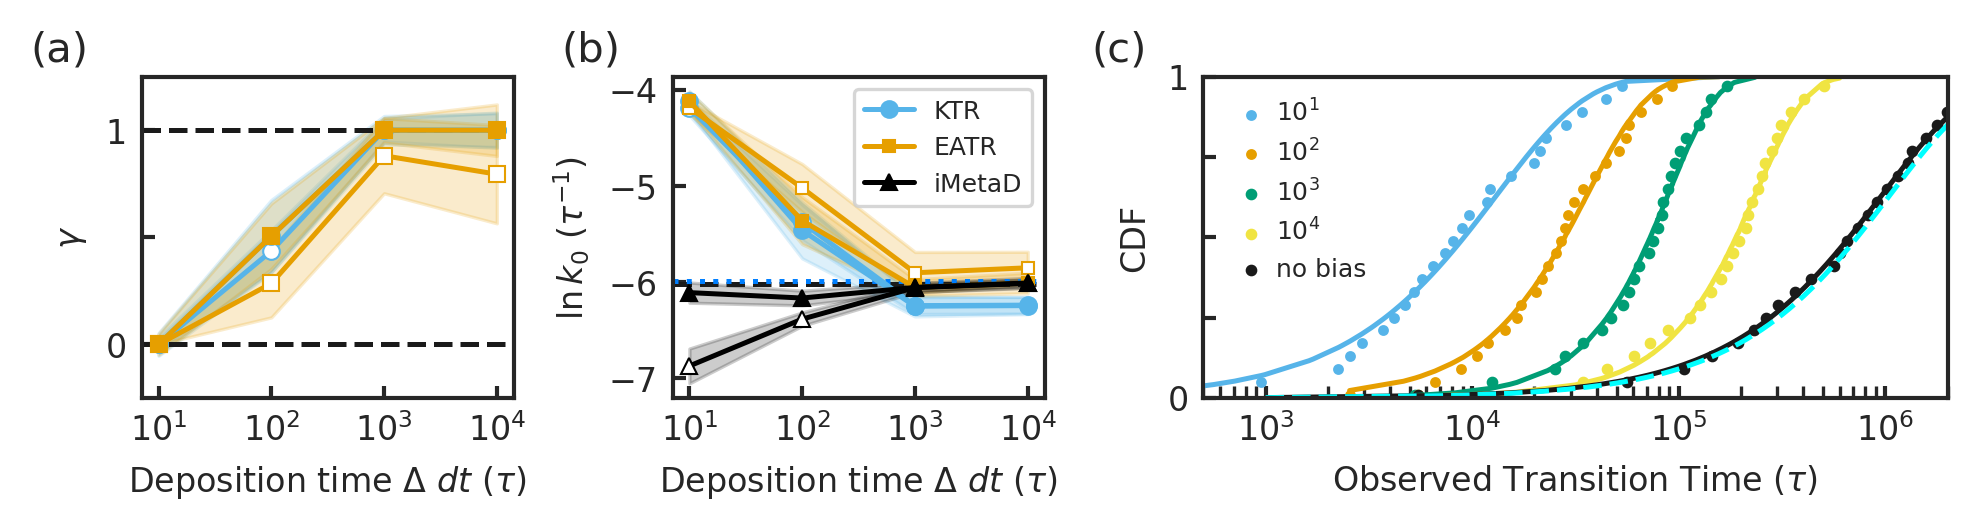

In [9]:
fig, axs = plt.subplots(1,3,figsize=(7.,1.7),width_ratios=[1,1,2],dpi=300)
plt.subplots_adjust(wspace=0.32,hspace=1.0,bottom=0.25,left=0.07,right=0.93)

axs[0].set_xlabel('Deposition time $\\Delta~dt$ ($\\tau$)')
axs[0].set_ylabel('$\\gamma$')
axs[0].set_ylim((-0.25,1.25))
axs[0].set_xscale('log')
axs[0].axhline(0,linestyle='--',color='k')
axs[0].axhline(1,linestyle='--',color='k')
axs[0].fill_between(pace_1d,np.array(X_rates_data["KTR Vmb MLE g"])-X_rates_data["KTR Vmb MLE std g"],np.array(X_rates_data["KTR Vmb MLE g"])+X_rates_data["KTR Vmb MLE std g"],color='#56B4E9',alpha=0.2)
axs[0].plot(pace_1d,np.array(X_rates_data["KTR Vmb MLE g"]),marker='o',mfc='#FFFFFF',markersize=4,mew=0.5,color='#56B4E9')
axs[0].fill_between(pace_1d,np.array(X_rates_data["KTR Vmb CDF g"])-X_rates_data["KTR Vmb CDF std g"],np.array(X_rates_data["KTR Vmb CDF g"])+X_rates_data["KTR Vmb CDF std g"],color='#56B4E9',alpha=0.2)
axs[0].plot(pace_1d,np.array(X_rates_data["KTR Vmb CDF g"]),label='KTR',marker='o',markersize=4,mew=0.5,color='#56B4E9')
axs[0].fill_between(pace_1d,np.array(X_rates_data["EATR MLE g"])-X_rates_data["EATR MLE std g"],np.array(X_rates_data["EATR MLE g"])+X_rates_data["EATR MLE std g"],color='#E69F00',alpha=0.2)
axs[0].plot(pace_1d,np.array(X_rates_data["EATR MLE g"]),marker='s',mfc='#FFFFFF',mew=0.5,color='#E69F00')
axs[0].fill_between(pace_1d,np.array(X_rates_data["EATR CDF g"])-X_rates_data["EATR CDF std g"],np.array(X_rates_data["EATR CDF g"])+X_rates_data["EATR CDF std g"],color='#E69F00',alpha=0.2)
axs[0].plot(pace_1d,np.array(X_rates_data["EATR CDF g"]),label='EATR',marker='s',mew=0.5,color='#E69F00')
axs[0].set_xticks([1e1,1e2,1e3,1e4])
axs[0].set_yticks([0,0.5,1],labels=['0','','1'])
axs[0].tick_params(axis='both', direction='in', which='both', length=3)
axs[0].text(-0.3,1.05,"(a)",fontsize=10,transform=axs[0].transAxes)

axs[1].set_xlabel('Deposition time $\\Delta~dt$ ($\\tau$)')
axs[1].set_ylabel('$\\ln k_0$ ($\\tau^{-1}$)')
axs[1].set_xscale('log')
axs[1].axhline(np.log10(kramers),linestyle='--',color='k')
axs[1].axhline(np.log10(observed),linestyle=':',color='#007FFF')
axs[1].fill_between(pace_1d,np.log10(np.array(X_rates_data["KTR Vmb MLE k"]))-X_rates_data["KTR Vmb MLE std k"],np.log10(np.array(X_rates_data["KTR Vmb MLE k"]))+X_rates_data["KTR Vmb MLE std k"],color='#56B4E9',alpha=0.2)
axs[1].plot(pace_1d,np.log10(np.array(X_rates_data["KTR Vmb MLE k"])),marker='o',mfc='#FFFFFF',mew=0.5,color='#56B4E9')
axs[1].fill_between(pace_1d,np.log10(np.array(X_rates_data["KTR Vmb CDF k"]))-X_rates_data["KTR Vmb CDF std k"],np.log10(np.array(X_rates_data["KTR Vmb CDF k"]))+X_rates_data["KTR Vmb CDF std k"],color='#56B4E9',alpha=0.2)
axs[1].plot(pace_1d,np.log10(np.array(X_rates_data["KTR Vmb CDF k"])),label='KTR',marker='o',mew=0.5,color='#56B4E9')
axs[1].fill_between(pace_1d,np.log10(np.array(X_rates_data["EATR MLE k"]))-X_rates_data["EATR MLE std k"],np.log10(np.array(X_rates_data["EATR MLE k"]))+X_rates_data["EATR MLE std k"],color='#E69F00',alpha=0.2)
axs[1].plot(pace_1d,np.log10(np.array(X_rates_data["EATR MLE k"])),marker='s',mfc='#FFFFFF',markersize=3,mew=0.5,color='#E69F00')
axs[1].fill_between(pace_1d,np.log10(np.array(X_rates_data["EATR CDF k"]))-X_rates_data["EATR CDF std k"],np.log10(np.array(X_rates_data["EATR CDF k"]))+X_rates_data["EATR CDF std k"],color='#E69F00',alpha=0.2)
axs[1].plot(pace_1d,np.log10(np.array(X_rates_data["EATR CDF k"])),label='EATR',marker='s',markersize=3,mew=0.5,color='#E69F00')
axs[1].fill_between(pace_1d,np.log10(np.array(X_rates_data["iMetaD MLE k"]))-X_rates_data["iMetaD MLE std k"],np.log10(np.array(X_rates_data["iMetaD MLE k"]))+X_rates_data["iMetaD MLE std k"],color='#000000',alpha=0.2)
axs[1].plot(pace_1d,np.log10(np.array(X_rates_data["iMetaD MLE k"])),marker='^',mfc='#FFFFFF',mew=0.5,color='#000000')
axs[1].fill_between(pace_1d,np.log10(np.array(X_rates_data["iMetaD CDF k"]))-X_rates_data["iMetaD CDF std k"],np.log10(np.array(X_rates_data["iMetaD CDF k"]))+X_rates_data["iMetaD CDF std k"],color='#000000',alpha=0.2)
axs[1].plot(pace_1d,np.log10(np.array(X_rates_data["iMetaD CDF k"])),label='iMetaD',marker='^',mew=0.5,color='#000000')
axs[1].set_xticks([1e1,1e2,1e3,1e4])
axs[1].set_yticks([-4,-5,-6,-7])
axs[1].legend()
axs[1].tick_params(axis='both', direction='in', which='both', length=3)
axs[1].text(-0.3,1.05,"(b)",fontsize=10,transform=axs[1].transAxes)

axs[2].set_xlabel('Observed Transition Time ($\\tau$)')
axs[2].set_ylabel('CDF')
axs[2].set_xlim((5e2,2e6))
axs[2].set_ylim((0,1))
axs[2].set_yticks([0,0.25,0.5,0.75,1],labels=['0','','','','1'])
axs[2].set_xscale('log')
axs[2].scatter(x1e3_fit[::4],y_cdfs_fit[::4],color='#56B4E9',marker='.',linewidths=0.6,label='$10^1$')
axs[2].plot(x1e3_fit,y1e3_fit,color="#56B4E9",linestyle='-')
axs[2].scatter(x1e4_fit[::4],y_cdfs_fit[::4],color='#E69F00',marker='.',linewidths=0.6,label='$10^2$')
axs[2].plot(x1e4_fit,y1e4_fit,color="#E69F00",linestyle='-')
axs[2].scatter(x1e5_fit[::4],y_cdfs_fit[::4],color='#009E75',marker='.',label='$10^3$')
axs[2].plot(x1e5_fit,y1e5_fit,color="#009E75",linestyle='-')
axs[2].scatter(x1e6_fit[::4],y_cdfs_fit[::4],color="#F0E442",marker='.',label='$10^4$')
axs[2].plot(x1e6_fit,y1e6_fit,color="#F0E442",linestyle='-')
axs[2].scatter(unbiased_ecdfx[1::8],unbiased_ecdfy[1::8],color="k",marker='.',label='no bias')
axs[2].plot(unbiased_tcdfx,unbiased_tcdfy_fit,color="k",linestyle='-')
axs[2].plot(unbiased_tcdfx,unbiased_tcdfy_kramers,color='cyan',linestyle='--')
axs[2].legend(frameon=False,handletextpad=0)
axs[2].tick_params(axis='both', direction='in', which='both', length=3)
axs[2].text(-0.15,1.05,"(c)",fontsize=10,transform=axs[2].transAxes)

plt.savefig("EATR_FigS1.pdf",format='pdf')